In [1]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.stats import ttest_rel
from scipy.stats import sem
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
default_img_set()

In [2]:
subjects = 22 # 22 subjects
regions = 7 # 7 brain regions
brainregions = ["V1","V2","V3","V3a","V3a\nmotion","hMT+","IPS"] # brain regions

# Load data
with open('Metrics_fMRI.pkl', 'rb') as f:
    Metrics = pickle.load(f)

idx = np.array([3, 5]) # V3a and hMT+ regions

signal_strength_pre = Metrics["signal_strength_pre"][:,idx]**2
signal_strength_post = Metrics["signal_strength_post"][:,idx]**2
noise_fluctuations_pre = Metrics["noise_fluctuations_pre"][:,idx]**2
noise_fluctuations_post = Metrics["noise_fluctuations_post"][:,idx]**2
sigstrength_mean = np.vstack((signal_strength_pre.mean(axis=0),signal_strength_post.mean(axis=0))).T
sigstrength_se = np.vstack((sem(signal_strength_pre,axis=0),sem(signal_strength_post,axis=0))).T

variance_mean = np.vstack((noise_fluctuations_pre.mean(axis=0),noise_fluctuations_post.mean(axis=0))).T
variance_se = np.vstack((sem(noise_fluctuations_pre, axis=0),sem(noise_fluctuations_post, axis=0))).T

In [3]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

2
2


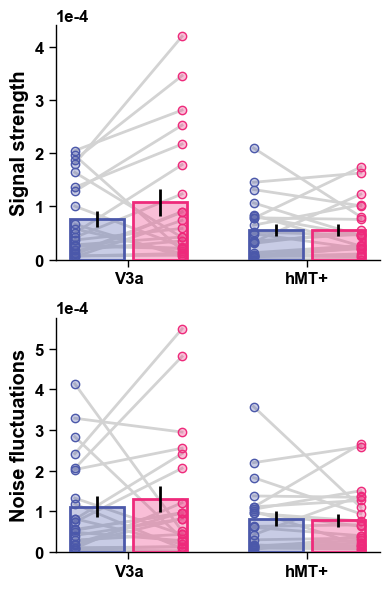

In [4]:
barwidth = 0.3

fig, ax = plt.subplots(2, 1, figsize=(4, 6))

deltax=0.3

# Signal strength of the decision neuron
plt.sca(ax[0])
#draw line
plot(np.array([0-deltax, 0+deltax]), np.vstack((signal_strength_pre[:,0],signal_strength_post[:,0])), fmt='-', color='lightgray')
plot(np.array([1-deltax, 1+deltax]), np.vstack((signal_strength_pre[:,1],signal_strength_post[:,1])), fmt='-', color='lightgray')
#draw dots
plot([0-deltax]*subjects, signal_strength_pre[:,0], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([0+deltax]*subjects, signal_strength_post[:,0], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([1-deltax]*subjects, signal_strength_pre[:,1], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*subjects, signal_strength_post[:,1], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
#draw bar
patch, _= bar(np.arange(2), sigstrength_mean, yerr=sigstrength_se, ecolor='k', width=barwidth,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.05, zorder=10)
ax[0].set_yscale("linear")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["V3a", "hMT+"])
ax[0].set_ylabel('Signal strength')
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))



# Noise fluctuations of the decision neuron
plt.sca(ax[1])
plot(np.array([0-deltax, 0+deltax]), np.vstack((noise_fluctuations_pre[:,0],noise_fluctuations_post[:,0])), fmt='-', color='lightgray')
plot(np.array([1-deltax, 1+deltax]), np.vstack((noise_fluctuations_pre[:,1],noise_fluctuations_post[:,1])), fmt='-', color='lightgray')
plot([0-deltax]*subjects, noise_fluctuations_pre[:,0], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([0+deltax]*subjects, noise_fluctuations_post[:,0], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([1-deltax]*subjects, noise_fluctuations_pre[:,1], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*subjects, noise_fluctuations_post[:,1], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)

patch, _= bar(np.arange(2), variance_mean, yerr=variance_se, width=barwidth, ecolor='k', facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.05,zorder=10)

ax[1].set_yscale("linear")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["V3a", "hMT+"])
ax[1].set_ylabel('Noise fluctuations')
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.savefig('FigS4_2.pdf')